# Image Processing

In [97]:
# Import torch
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from helper_functions import *
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
from PIL import Image
print(torch.__version__)

# TODO: Setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

2.6.0+cu124


'cpu'

In [98]:
def visualize_processing(image_path, process_method, device='cpu'):
    img = Image.open(image_path).convert('RGB')
    
    transform = transforms.Compose([
        transforms.Resize((64, 64)),  
        transforms.ToTensor(),        
    ])
    
    img_tensor = transform(img).unsqueeze(0).to(device)  # Shape: [1, 3, 64, 64]
    print(img_tensor.shape)
    processed = process_method(img_tensor)

    fig = plt.figure(figsize=(9, 9))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_title("Original Image")
    ax1.imshow(img_tensor.squeeze().permute(1, 2, 0).cpu())  # [H, W, C]
    ax1.axis('off')

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title("Processed Output (Channel 0)")
    
    processed_img = processed[0, 0, :, :].detach().cpu() 
    ax2.imshow(processed_img, cmap='gray')
    ax2.axis('off')
    
    plt.show()


In [82]:
image_path = './img/fuuka.png'

## Convolutions
Convolutions slides a kernel(just another matrix) on your image, then multiplies each pairwise and adds em up!

Several notes about it:
1. Kernel->size of the matrix
2. Stride->how much do we skip on each slide
3. Padding->add image padding, better performance

torch.Size([1, 3, 64, 64])


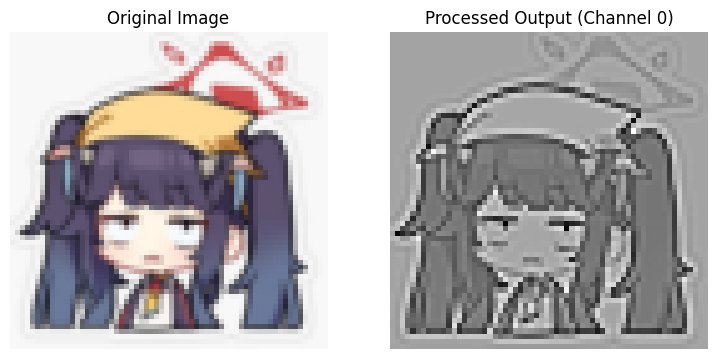

In [123]:
def convolution(input:np.array, kernel=None, stride=1, padding=0):
    if kernel is None:
        kernel = np.array([
            [0, -1,  0],
            [-1,  5, -1],
            [0, -1,  0]
        ])
    batch_img,c_img,x_img, y_img = input.shape

    x_kern, y_kern = kernel.shape
    xoutDim=int((x_img + 2 * padding - x_kern) / stride) + 1
    youtDim=int((y_img + 2 * padding - y_kern) / stride) + 1
    output = np.zeros((batch_img ,c_img, xoutDim, youtDim)) 
    # print(f"in shape {input.shape}")
    # print(f"out shape {output.shape}")
    # print(f"kernel shape {kernel.shape}")
    for b in range(batch_img):
        for c in range(c_img):
            for y in range(0, youtDim):
                for x in range(0, xoutDim):
                    region=input[b,c,y*stride:y*stride+y_kern,x*stride:x*stride+x_kern]
                    # print(f"{region.numpy().shape} {kernel.shape}")
                    # output[b, c, y, x]=torch.sum(region*kernel)
                    output[b, c, y, x]=np.sum(region.numpy()*kernel)

    return torch.from_numpy(output)
    
visualize_processing(image_path, convolution)

torch.Size([1, 3, 64, 64])


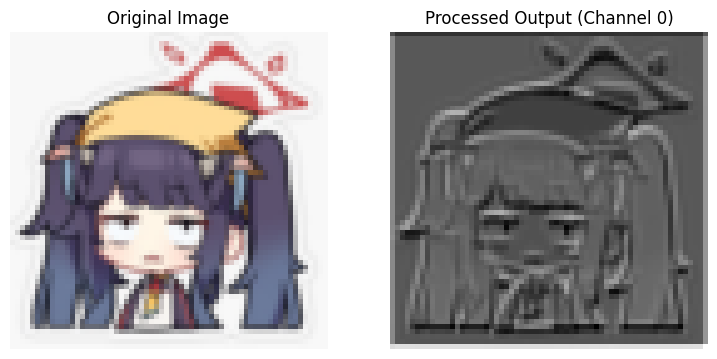

In [84]:
conv_layer = torch.nn.Conv2d(3, 10, kernel_size=3, padding=1)
# conv_layer

visualize_processing(image_path, conv_layer)

### Fourier Transform and Convolutions
The Fourier transform

## MaxPooling
Maxpooling slides a kernel(just another matrix) on your image, then searches for the max value in that kernel


torch.Size([1, 3, 64, 64])
(1, 3, 21, 21)


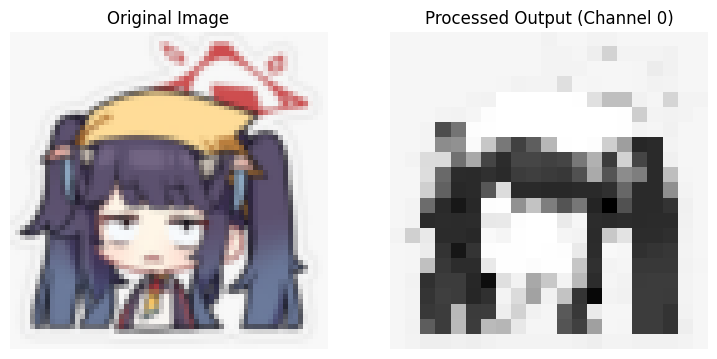

In [124]:
def MaxPool(input:np.array, kernel=None, stride=1, padding=0):
    if kernel is None:
        kernel = np.array([
            [0, -1,  0],
            [-1,  5, -1],
            [0, -1,  0]
        ])
    batch_img,c_img,x_img, y_img = input.shape

    x_kern, y_kern = kernel.shape
    # (64 +2*0-3 / 1)+1
    xoutDim=int((x_img + 2 * padding - x_kern) / (stride*x_kern)) + 1
    youtDim=int((y_img + 2 * padding - y_kern) / (stride*y_kern)) + 1
    output = np.zeros((batch_img ,c_img, xoutDim, youtDim)) 
    # print(f"in shape {input.shape}")
    # print(f"out shape {output.shape}")
    # print(f"kernel shape {kernel.shape}")
    for b in range(batch_img):
        for c in range(c_img):
            for y in range(0, youtDim):
                for x in range(0, xoutDim):
                    region=input[b,c,y*stride*y_kern:y*stride*y_kern+y_kern, x*stride*x_kern:x*stride*x_kern+x_kern]
                    # print(f"{region.numpy().shape} {kernel.shape}")
                    # output[b, c, y, x]=torch.sum(region*kernel)
                    output[b, c, y, x]=np.max(region.numpy())
    print(output.shape)
    return torch.from_numpy(output)
    
visualize_processing(image_path, MaxPool)

torch.Size([1, 3, 64, 64])


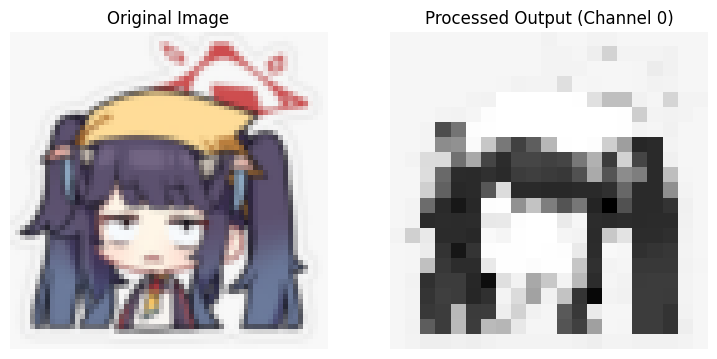

In [ ]:
pool_layer = torch.nn.MaxPool2d(2)
# conv_layer

visualize_processing(image_path, pool_layer)

## AvgPooling
AVERAGEpooling slides a kernel(just another matrix) on your image, then searches for the average value in that kernel


torch.Size([1, 3, 64, 64])
(1, 3, 21, 21)


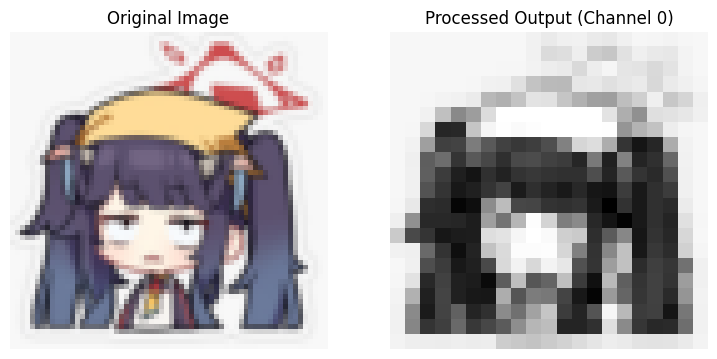

In [128]:
def AvgPool(input:np.array, kernel=None, stride=1, padding=0):
    if kernel is None:
        kernel = np.array([
            [0, -1,  0],
            [-1,  5, -1],
            [0, -1,  0]
        ])
    batch_img,c_img,x_img, y_img = input.shape

    x_kern, y_kern = kernel.shape
    # (64 +2*0-3 / 1)+1
    xoutDim=int((x_img + 2 * padding - x_kern) / (stride*x_kern)) + 1
    youtDim=int((y_img + 2 * padding - y_kern) / (stride*y_kern)) + 1
    output = np.zeros((batch_img ,c_img, xoutDim, youtDim)) 
    # print(f"in shape {input.shape}")
    # print(f"out shape {output.shape}")
    # print(f"kernel shape {kernel.shape}")
    for b in range(batch_img):
        for c in range(c_img):
            for y in range(0, youtDim):
                for x in range(0, xoutDim):
                    region=input[b,c,y*stride*y_kern:y*stride*y_kern+y_kern, x*stride*x_kern:x*stride*x_kern+x_kern]
                    # print(f"{region.numpy().shape} {kernel.shape}")
                    # output[b, c, y, x]=torch.sum(region*kernel)
                    output[b, c, y, x]=np.average(region.numpy())
    print(output.shape)
    return torch.from_numpy(output)
    
visualize_processing(image_path, AvgPool)

torch.Size([1, 3, 64, 64])


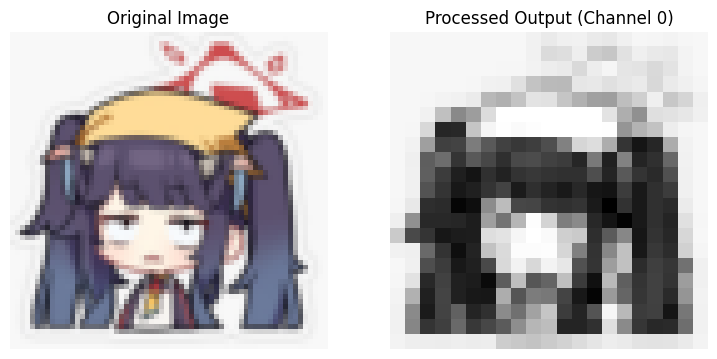

In [127]:
avgpool_layer = torch.nn.AvgPool2d(3)
# conv_layer

visualize_processing(image_path, avgpool_layer)